In [2]:
import numpy as np
from scipy.stats import gamma
from scipy.stats import expon
from scipy.stats import norm
from scipy.stats import invgamma
import matplotlib.pyplot as plt
import pandas as pd

# Module 4:  Models for Continuous Data

## Course Contents
* lesson 9: Exponential Data
* lesson 10: Normal Data
* lesson 11: Back to priors: objective choince of priors, non-informatives, Jeffreys prior
* lesson 12: Linear Regression


## Lession 9 - exponential data
You're waiting for a bus but you're not sure how often it comes.

$$Y \sim Exp(\lambda)$$

The prior predictive is the mean $\frac{1}{\lambda}$

The conjugate of the exponential is also the Gamma

When picking a prior here, if we think the bus comes once per 10 minutes, the mean is 1/10, so preior predictive is 0.1.

So say we pick a prior Gamma(100,1000), so prior mean is 0.1, and prior standard deviation is 10/1000, or 0.01.

Thinking of a rough interval of 2 standard deviations, we get 0.1 + or - 0.02 as a range

Say we wait for 12 mins and a but arrives (Y=12). What's our posterior predictive?

$$f(\lambda \mid y) \propto f(y\mid \lambda)f(\lambda) \propto \lambda e^{-\lambda y} \lambda{\alpha-1} e^{-\beta\lambda} \propto \lambda^{(\alpha+1)-1} e^{-(\beta+y)\lambda}$$

The last is the pdf of a gamma distribution, so we can say

$$\lambda \mid y \sim \text{Gamma}(\alpha+1, \beta+y)$$

For our example then

$$\lambda \mid y \sim \text{Gamma}(101,1012)$$

And our posterior mean is $\frac{101}{1012} = 0.0998$. Our posterior doesn't shift much, because our data doesn't contain a lot of information (12) vs. our prior (1000). One data point doesn't chnage the prior much if our standard standard deviation is small.



#### Miniquiz

We can generalize the result from the lesson to more than one data point.

Suppose $Y_1, \ldots, Y_n$ are independent and identically distributed exponential with mean $1/\lambda$, and assume a $\text{Gamma}(\alpha, \beta)$ prior for $\lambda$. The likelihood is then $f(\tilde{y} \mid \lambda) = \lambda^n e^{-\lambda \sum y_i}$, and we can follow the same steps from the lesson to obtain the posterior distribution (try to derive it yourself):

$\lambda \mid \mathbf{y} \sim \text{Gamma}(\alpha + n, \beta + \sum y_i)$

What is the prior effective sample size in this model?

#### Answer

The prior mean is $\frac{\alpha}{\beta}$ and the data mean is $\frac{n}{\Sigma y_i}$.

The posterior mean is 

$$\frac{n+\alpha}{\beta+\Sigma y_i} = \frac{n}{\beta + \Sigma y_i} + \frac{\alpha}{\beta + \Sigma y_i} = \frac{\Sigma y_i}{\beta + \Sigma y_i}\cdot \frac{n}{\Sigma y_i} + \frac{\beta}{\beta + \Sigma y_i} \cdot \frac{\alpha}{\beta}$$

So the effective sample size is the term equivalent to $n$ in the prior weighted term, which is $\alpha$

## Lesson 9 Quiz

For Questions 1-3, refer to the bus waiting time example from the lesson.

### Q1
Recall that we used the conjugate gamma prior for $\lambda$, the arrival rate in busses per minute. Suppose our prior belief about this rate is that it should have mean 1/20 arrivals per minute with standard deviation 1/5. Then the prior is $\text{Gamma}(a, b)$ with $a=1/16$.

Find the value of $b$. Round your answer to two decimal places.

In [12]:
mean = 1/20
a = 1/16
b = a/mean
b

1.25

### Q2
Suppose that we wish to use a prior with the same mean (1/20), but with effective sample size of one arrival. Then the prior for $\lambda$ is $\text{Gamma}(1, 20)$.

In addition to the original $Y_1=12$ we observe the waiting times for four additional busses: $Y_2=15, Y_3=8, Y_4=13.5,Y_5=25$.

Recall that with multiple (independent) observations, the posterior for $\lambda$ is $\text{Gamma}(\alpha, \beta)$ where $\alpha = a + n$ and $\beta = b + \sum y_i$ 

What is the posterior mean for $\lambda$? Round your answer to two decimal places.

In [13]:
y = [12,15,8,13.5,25]
a = 1
b = 20
n = 5
postmean = (a+n)/(b+np.sum(y))
postmean

0.06417112299465241

### Q3 THIS ANSWER IS WRONG, DON'T KNOW WHY, FUCK IT
Continuing Question 2, use R or Excel to find the posterior probability that $\lambda < 1/10$? Round your answer to two decimal places.

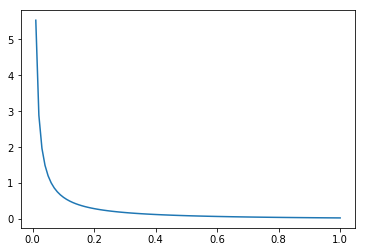

(6, 78.5)

In [20]:
alpha = a+n
beta = n+np.sum(y)
lam = np.linspace(0,1,101)
plt.plot(lam, gamma.pdf(lam,alpha/beta))
plt.show()
(alpha,beta)

In [19]:
gamma.cdf(0.1, alpha, scale = 1/beta)

0.7946338247415933

For Questions 4-10, consider the following earthquake data:

The United States Geological Survey maintains a list of significant earthquakes worldwide. We will model the rate of earthquakes of magnitude 4.0+ in the state of California during 2015. An iid exponential model on the waiting time between significant earthquakes is appropriate if we assume:

1. earthquake events are independent,
2. the rate at which earthquakes occur does not change during the year, and
3. the earthquake hazard rate does not change (i.e., the probability of an earthquake happening tomorrow is constant regardless of whether the previous earthquake was yesterday or 100 days ago).

Let $Y_i$ denote the waiting time in days between the ith earthquake and the following earthquake. Our model is $Y_i \overset{\text{iid}}{\sim} \text{Exponential}(\lambda)$ where the expected waiting time between earthquakes is $E(Y) = 1/\lambda$ days.

Assume the conjugate prior $\lambda \sim \text{Gamma}(a,b)$. Suppose our prior expectation for $\lambda$ is 1/30, and we wish to use a prior effective sample size of one interval between earthquakes.

### Q4
What is the value of $a$?

$\alpha$ is the effective sample size, so 1

### Q5
What is the value of $b$?

a/b = mean, mean is 1/lambda = 1/30, so b=30/a, b is 30

### Q6
The significant earthquakes of magnitude 4.0+ in the state of California during 2015 occurred on the following dates (http://earthquake.usgs.gov/earthquakes/browse/significant.php?year=2015):

January 4, January 20, January 28, May 22, July 21, July 25, August 17, September 16, December 30.

Recall that we are modeling the waiting times between earthquakes in days. What is our data vector?

16, 8, 114, 60, 4, 23, 30, 105

### Q7
The posterior distribution is $\lambda \mid \mathbf{y} \sim \text{Gamma}(\alpha, \beta)$. What is the value of $\alpha$?

$\alpha = a + n = 1 + 8 = 9$

### Q8
The posterior distribution is $\lambda \mid \mathbf{y} \sim \text{Gamma}(\alpha, \beta)$. What is the value of $\beta$?

$\beta = b + \Sigma y_i$

In [6]:
a = 1
b = 30
y = [16,8,114,60,4,23,30,105]
n = 8
alpha = a+n 
beta = 30+np.sum(y)
(alpha, beta)

(9, 390)

In [7]:
priormean = a/b
postmean = alpha/beta
(1/priormean, 1/postmean)

(30.0, 43.33333333333333)

Which is saying an earthquake every 43 days. Seems reasonable since sample mean is 45 with size 8, and our prior was 30 days with sample size 1 

### Q9
Use R or Excel to calculate the upper end of the 95% equal-tailed credible interval for $\lambda$, the rate of major earthquakes in events per day. Round your answer to two decimal places.

In [21]:
alpha = 9
beta = 390
(gamma.ppf(0.025,alpha, scale =1/beta),gamma.ppf(0.975,alpha, scale =1/beta))

(0.010552238711226496, 0.04041843389793157)

### Q10
The posterior predictive density for a new waiting time $y^*$ in days is:

$$f(y^* \mid \mathbf{y} ) = \int f(y^* \mid \lambda) \cdot f(\lambda \mid \mathbf{y}) d\lambda = \frac{ \beta^\alpha \Gamma(\alpha + 1) }{ (\beta + y^*)^{\alpha + 1} \Gamma(\alpha) } I_{\{y^* \ge 0 \}} = \frac{ \beta^\alpha \alpha}{ (\beta + y^*)^{\alpha + 1}} I_{\{y^* \ge 0 \}}$$

where $f(\lambda \mid \mathbf{y})$ is the $\text{Gamma}(\alpha, \beta)$ posterior found earlier. Use R or Excel to evaluate and plot this posterior predictive PDF

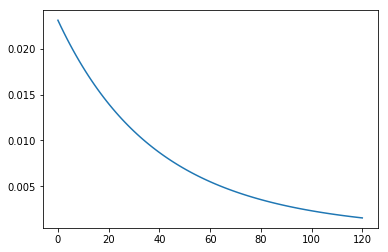

In [9]:
alpha = 9
beta = 390
y = np.linspace(0,120,101)
fy = (beta**alpha * alpha)/((beta+y)**(alpha+1))
plt.plot(y,fy)
plt.show()

## Lesson 10.1 Normal likelihood with variance known

Suppose we know the standard deviation and only want to know the mean. This often happens in industrial processes.

$$X_i \overset{\text{iid}}\sim N(\mu,\sigma_0^2)$$

How to choose a prior for $\mu$, what is conjugate to the Normal? turns out the Normal is conjugate to itself for it's mean parameter.

Prior $\mu \sim N(m_0, S_0^2)$ (using 0's to specify these are particular values, not parameters)

$$f(\mu \mid \tilde{x}) \propto f(\tilde{x} \mid \mu)f(\mu)$$

(Lots of math, including completing the square, which I very vaguely remember)

$$\mu \mid \tilde{x} \sim N\left(\frac{\frac{n \bar{x}}{\sigma_0^2}+\frac{m_0}{S_0^2}}{\frac{n}{\sigma_0^2}+\frac{1}{S_0^2}},\frac{1}{\frac{n}{\sigma_0^2}+\frac{1}{S_0^2}} \right)$$

#### Posterior Mean
can be re-written as 

$$\frac{\frac{n}{\sigma_0^2}}{\frac{n}{\sigma_0^2}+\frac{1}{S_0^2}} \bar{x} + \frac{\frac{1}{S_0^2}}{\frac{n}{\sigma_0^2}+\frac{1}{S_0^2}}m = \frac{n}{n+\frac{\sigma_0^2}{S_0^2}} \bar{x} + \frac{\frac{\sigma_0^2}{S_0^2}}{n+\frac{\sigma_0^2}{S_0^2}}m$$

So again the weighted average of the data mean and the prior. The effective weighting of the prior mean is the ratio of the variance of the data against the variance of the prior.  Which makes sense, because the larger the variance in the prior, the less information is contains.

### Miniquiz
The prior (and posterior) predictive distribution for data is particularly simple in the conjugate normal model. If $Y \mid \theta \sim \text{N}(\theta, \sigma^2)$ and $\theta \sim \text{N}(m_0, s_0^2)$, then the marginal distribution for $Y$, obtained as $\int f(y, \theta) d\theta$, is $\text{N}(m_0, s_0^2 + \sigma^2)$

Suppose your data are normally distributed with mean $\theta$ and variance 1. You select a normal prior for $\theta$ with mean 0 and variance 2. Then the prior predictive distribution for one data point would be $\text{N}(0, a)$. Find the value of $a$.

In [22]:
3

3

### Posterior Predictive
Plugging in the posterior params to this formula

$$X | \tilde{x} \sim N(m_1,{s_1}^2+\sigma^2)$$

## Lesson 10.2 Normal likelihood with variance unknown

If both mean and variance are unknown you can specify a prior in a hierarchical fashion.

$$X_i \mid \mu, \sigma^2 \overset{\text{iid}}\sim N(\mu,\sigma^2)$$

We give a distribution for $\mu$ condition on $\sigma$

$$\mu \mid \sigma^2 \sim N\left(m,\frac{\sigma^2}{w}\right)$$

Where $w=\frac{\sigma^2}{\sigma_\mu^2}$, the effective sample size of the prior

$\sigma$ we specify a inverse gamma prior for. 

$$\sigma^2 \sim \Gamma^{-1}(\alpha, \beta)$$

We can get a posterior for $\sigma$

$$\sigma^2 \mid \tilde{x} \sim \Gamma^{-1}\left(\alpha+\frac{n}{2},\beta+\frac{1}{2}\sum_{i=1}^n (x_i-\bar{x})^2 + \frac{nw}{2(n+w)}(\bar{x} - m)^2\right)$$

The posterior for $\mu$, conditional on sigma

$$\mu \mid \sigma^2,\tilde{x} \sim N\left(\frac{n\bar{x}+wm}{n+w},\frac{\sigma^2}{n+w}\right)$$

Note the mean term in this last one iscan be written as the weighted average of the prior mean and the data mean

$$\frac{n\bar{x}+wm}{n+w} = \frac{w}{n+w}m+\frac{n}{n+w}\bar{x}$$

Sometimes you only really care about $\mu$, and don't want it to depend on $\sigma$. You can integrate it out and get a posterior for $\mu$ which follows the t distribution

$$\mu \mid \tilde{x} \sim t$$

The posterior predictive distirbution is also a t distribution

## Lesson 10 Quiz
For Questions 1-6, consider the thermometer calibration problem from the quiz in Lesson 6.

Suppose you are trying to calibrate a thermometer by testing the temperature it reads when water begins to boil. Because of natural variation, you take $n$ independent measurements (experiments) to estimate $\theta$, the mean temperature reading for this thermometer at the boiling point. Assume a normal likelihood for these data, with mean $\theta$ and known variance $\sigma^2 = 0.25$ (which corresponds to a standard deviation of 0.5 degrees Celsius).

Suppose your prior for $\theta$ is (conveniently) the conjugate normal. You know that at sea level, water should boil at 100 degrees Celsius, so you set the prior mean at $m_0=100$ 

### Q1
If you specify a prior variance $s_0^2$ for $\theta$, what is the model for your measurements $Y_i$, $i=1,\ldots,n$?

$$Y_i \mid \theta \overset{\text{iid}}\sim N\left(\theta,\sigma^2 = 0.25\right)$$

$$\theta \sim N(m_0 = 100, s_0^2)$$

### Q2
You decide you want the prior to be equivalent (in effective sample size) to one measurement.

What value should you select for $s_0^2$ the prior variance of $\theta$? Round your answer to two decimal places.

In [1]:
0.25

0.25

### Q3
You collect the following n=5 measurements: (94.6, 95.4, 96.2, 94.9, 95.9).

What is the posterior distribution for $\theta$?

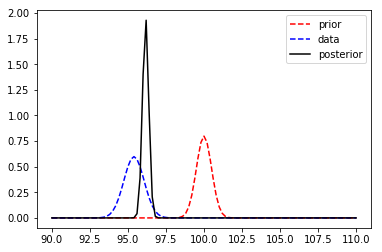

(96.16666666666667, 0.041666666666666664)

In [19]:
y = [94.6,95.4,96.2,94.9,95.9]
n = 5
ybar = np.mean(y)
sigma_sq = 0.25
s0_sq = 0.25
m0 = 100
m1 = (n*ybar/sigma_sq + m0/s0_sq) / (n/sigma_sq + 1/s0_sq)
s1_sq = 1/(n/sigma_sq + 1/s0_sq)


theta = np.linspace(90,110,101)
prior = norm.pdf(theta, m0, np.sqrt(s0_sq))
post = norm.pdf(theta, m1, np.sqrt(s1_sq))
data = norm.pdf(theta, ybar, np.std(y,ddof=1))
plt.plot(theta,prior,linestyle = 'dashed',color='red',label='prior')
plt.plot(theta,data,linestyle = 'dashed',color='blue',label='data')
plt.plot(theta,post,color='black',label='posterior')
plt.legend(loc='best')
plt.show()
(m1,s1_sq)

### Q4
Use R or Excel to find the upper end of a 95% equal-tailed credible interval for θ.

In [21]:
(norm.ppf(0.025,m1,np.sqrt(s1_sq)),norm.ppf(0.975,m1,np.sqrt(s1_sq)))

(95.76659069363706, 96.56674263969629)

### Q5
After collecting these data, is it reasonable to conclude that the thermometer is biased toward low values?

In [20]:
norm.cdf(100,m1,s1)

1.0

Probability theta is less than 100 given the results set is 1

### Q6
What is the posterior predictive distribution of a single future observation $Y^*$?


$Y^* \mid \theta \sim N(m_0,s_0^2+\sigma_0^2)$

In [22]:
(m1, s1_sq+sigma_sq)

(96.16666666666667, 0.2916666666666667)

For Questions 7-10, consider the following scenario:

Your friend moves from city A to city B and is delighted to find her favorite restaurant chain at her new location. After several meals, however, she suspects that the restaurant in city B is less generous. She decides to investigate.

She orders the main dish on 30 randomly selected days throughout the year and records each meal's weight in grams. You still live in city A, so you assist by performing the same experiment at your restaurant. Assume that the dishes are served on identical plates (measurements subtract the plate's weight), and that your scale and your friend’s scale are consistent.

The following histogram shows the 30 measurements from Restaurant B taken by your friend.

![title](hist.svg)

### Q7
Is it reasonable to assume that these data are normally distributed?

* Yes, the distribution appears to follow a bell-shaped curve.
* Yes, the data are tightly clustered around a single number.
* No, the first bar to the left of the peak is not equal in height to he first bar to the right of the peak.
* **No, there appear to be a few extreme observations (outliers).**

### Q8
Your friend investigates the three observations above 700 grams and discovers that she had ordered the incorrect meal on those dates. She removes these observations from the data set and proceeds with the analysis using $n=27$.

She assumes a normal likelihood for the data with unknown mean $\mu$ and unknown variance $\sigma^2$. She uses the model presented in Lesson 10.2 where, conditional on $\sigma^2$, the prior for $\mu$ is normal with mean $m$ and variance $\sigma^2 / w$. Next, the marginal prior for $\sigma^2$ is $\text{Inverse-Gamma}(a,b)$.

Your friend's prior guess on the mean dish weight is 500 grams, so we set $m=500$. She is not very confident with this guess, so we set the prior effective sample size $w=0.1$. Finally, she sets $a=3$ and $b=200$.

We can learn more about this inverse-gamma prior by simulating draws from it. If a random variable $X$ follows a $\text{Gamma}(a,b)$ distribution, then $\frac{1}{X}$ follows an $\text{Inverse-Gamma}(a,b)$ distribution. Hence, we can simulate draws from a gamma distribution and take their reciprocals, which will be draws from an inverse-gamma. 

(this is slightly different to the results I get below, where if $X\sim\text{Gamma}(a,b)$ distribution, then $\frac{1}{X} \sim\text{Inverse-Gamma}(a,1/b)$ my results isn't right, per wikipedia - no idea what's going on here)

Simulate a large number of draws (at least 300) from the prior for $\sigma^2$ and report your approximate prior mean from these draws. It does not need to be exact.

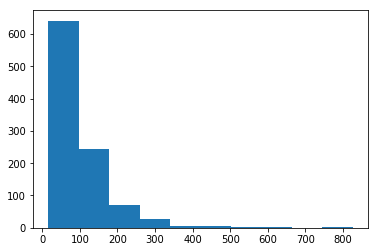

100.0763178651963

In [38]:
r=1/gamma.rvs(3,scale = 1/200, size=1000)
plt.hist(r)
plt.show()
np.mean(r)

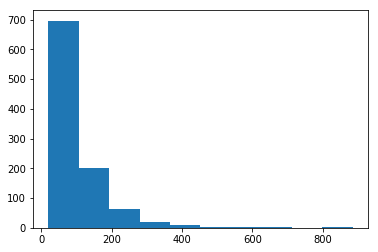

102.63896029906331

In [40]:
s=invgamma.rvs(3,scale = 200, size=1000)
plt.hist(s)
plt.show()
np.mean(s)

### Q9
With the $n=27$ data points, your friend calculates the sample mean $\bar{y} = 609.7$ and sample variance $s^2 = \frac{1}{n-1} \sum(y_i - \bar{y})^2 = 401.8$

Using the update formulas from Lesson 10.2, she calculates the following posterior distributions:

$\sigma^2 \mid \mathbf{y} \sim \text{Inverse-Gamma}(a', b')$

$\mu \mid \sigma^2, \mathbf{y} \sim \text{N}(m', \frac{\sigma^2}{w+n})$

where

$a' = a + \frac{n}{2} = 3 + \frac{27}{2} = 16.5$

$b' = b + \frac{n-1}{2} s^2 + \frac{wn}{2(w+n)}(\bar{y}-m)^2 = 200 + \frac{27-1}{2} 401.8 + \frac{0.1\cdot 27}{2(0.1+27)}(609.7-500)^2 = 6022.9$

$m' = \frac{n\bar{y} + wm}{w + n} = \frac{27\cdot 609.7 + 0.1\cdot 500}{0.1 + 27} = 609.3$

$w=0.1$, and $w+n=27.1$.

To simulate draws from this posterior, begin by drawing values for $\sigma^2$ from its posterior using the method from the preceding question. Then, plug these values for $\sigma^2$ into the posterior for $\mu$ and draw from that normal distribution.

Perform the posterior simulation described above and compute your approximate 95% equal-tailed credible interval for $\mu$. Based on your simulation, which of the following appears to be the actual interval?

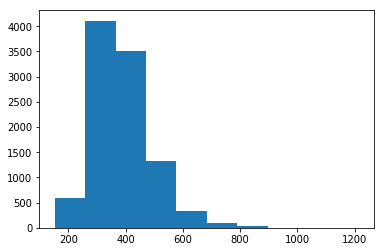

388.3961493923754

In [52]:
s1_sq_est=1/gamma.rvs(16.5,scale = 1/6022.9, size=10000)
plt.hist(s1_sq_est)
plt.show()
np.mean(s1_sq_est)

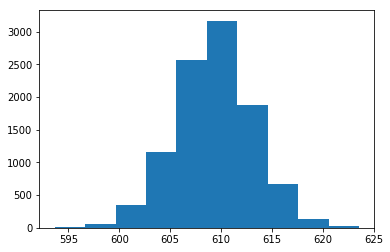

609.3379529170072

In [71]:
mu1_est = norm.rvs(609.3,np.sqrt(s1_sq_est/(27.1)),size=10000)
plt.hist(mu1_est)
plt.show()
np.mean(mu1_est)

In [72]:
(np.percentile(mu1_est,2.5),np.percentile(mu1_est,97.5))

(601.6806522347547, 616.8155872477917)

### Q10
You complete your experiment at Restaurant A with $n=30$ data points, which appear to be normally distributed. You calculate the sample mean $\bar{y} = 622.8$ and sample variance $s^2 = \frac{1}{n-1} \sum(y_i - \bar{y})^2 = 403.1$

Repeat the analysis from Question 9 using the same priors and draw samples from the posterior distribution of $\sigma_A^2$ and $\mu_A$ (where the $A$ denotes that these parameters are for Restaurant A).

Treating the data from Restaurant A as independent from Restaurant B, we can now attempt to answer your friend's original question: is restaurant A more generous? To do so, we can compute posterior probabilities of hypotheses like $\mu_A > \mu_B$. This is a simple task if we have simulated draws for $\mu_A$ and $\mu_B$. For $i=1, \ldots, N$ (the number of simulations drawn for each parameter), make the comparison $\mu_A > \mu_B$ using the ith draw for $\mu_A$ and $\mu_B$. Then count how many of these return a TRUE value and divide by NN, the total number of simulations.

Would you conclude that the main dish from restaurant A weighs more than the main dish from restaurant B on average? Why

$$\sigma^2 \mid \tilde{x} \sim \Gamma^{-1}\left(\alpha+\frac{n}{2},\beta+\frac{1}{2}\sum_{i=1}^n (x_i-\bar{x})^2 + \frac{nw}{2(n+w)}(\bar{x} - m)^2\right)$$

$$= \Gamma^{-1}\left(\alpha+\frac{n}{2},\beta+\frac{n-1}{2} s^2 + \frac{nw}{2(n+w)}(\bar{x} - m)^2\right)$$

In [84]:
alpha = 3
beta = 200
m = 500
w = 0.1
n = 30
ybarA = 622.8
s_sq = 403.1

a1 = alpha+(n/2)
b1 = beta + ((n-1)/2)*s_sq + ((n*w)/(2*(n+w)))*(ybar-m)**2
(a1,b1) # parameters of sig_sq1

(18.0, 6796.437043189369)

$$\mu \mid \sigma^2,\tilde{x} \sim N\left(\frac{n\bar{x}+wm}{n+w},\frac{\sigma^2}{n+w}\right)$$

In [85]:
m1 = (n*ybar + w*m)/(n+w)
m1

622.3920265780731

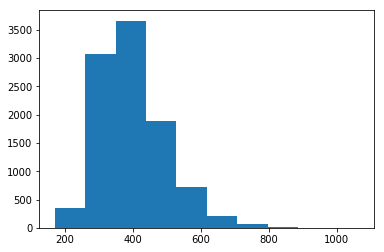

In [86]:
sig_sq1_est = 1/gamma.rvs(a1, scale = 1/b1, size = 10000)
plt.hist(sig_sq1_est)
plt.show()

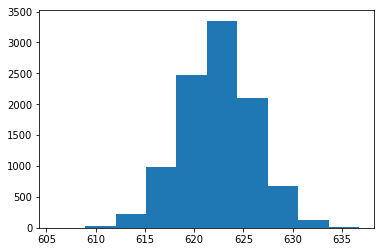

(615.0605334851613, 629.5621953447818)

In [87]:
mu1_estA = norm.rvs(m1, np.sqrt(sig_sq1_est/(w+n)), size = 10000)
plt.hist(mu1_estA)
plt.show()
(np.percentile(mu1_estA, 2.5),np.percentile(mu1_estA,97.5))

In [88]:
diffs = mu1_estA > mu1_est
np.mean(diffs)

0.9913

## Lesson 11-1: Non-informative Priors

Priors can
* contain significant information
* be 'vague', contain minamal information
* be non-informative, providing NO information

The last will minimise the impact of our prior on the posterior.

Back to coin flipping, $Y \sim B(\theta)$. How to minimise info in prior? We saw a prior where all values are equally likely, $\theta \sim U[0,1]$ This seems like it might have minimal info in it, but recall this is a $Beta(1,1)$ distribution - the effective sample size is actually 2. What about Beta(0.5,0.5)? Less information. 

The logical conclusion of this is a $Beta(0,0)$. Is this possible? It looks like $f(\theta) \propto \theta^{-1}(1-\theta)^{-1}$.

It's not a proper density in that it doesn't integrate to 1 over all values. You can't normalise it. It is an **improper prior**. But we can still use it. As long as your data has at least one success and one failure you can use it. Your posterior will be

$$f(\theta \mid y) \propto \theta^{y-1}(1-\theta)^{n-y-1} \sim Beta(y,n-y)$$

with posterior mean $y/n = \hat{\theta}$, or the MLE. In other words, by using the improper prior you get the same result as if you had used the frequentist approach, but you can still make interval statements.

Using imporpoer priors is fine as long as your posterior is proper (subject to a few gotchas, like needing to observe at least 1 success and 1 failure).

For many problems you can fine a prior (usually improper) which leads to the same PDF as a frequentist approach.

Another example: Normal case $Y_i \overset{\text{iid}}\sim N(\mu, \sigma^2)$. Assume sigma is known.

A vague prior would be $\mu \sim N(0,1000000^2)$

If you let the limit go to infinity, $f(\mu) \propto 1$, you get a posterior $\mu \mid \tilde{y} \sim N(\bar{y},\frac{\sigma^2}{n})$. Again, the MLE.

For sigma unknown, $f(\sigma^2)\propto \frac{1}{\sigma^2}$, which is $\Gamma^{-1}(0,0)$, uniform on the log scale of sigma^2. You get a posterior $\sigma^2 \mid \tilde{y} \sim \Gamma^{-1}\left(\frac{n-1}{2},\frac{1}{2} \Sigma(y_i-\bar{y})^2\right)$

## Lesson 11-2: Jeffreys Prior

we saw a $f(\sigma^2) \propto \frac{1}{\sigma^2}$, uniform on log scale.

What if we chose a uniform prior on a normal scale, $f(\sigma^2) \propto 1$? You will end up with a different prior. Another way of saying this is that priors are not transformation invariant depending on the parameterisation.

The Jeffreys Prior is a way around this. It's $f(\theta)\propto\sqrt{I(\theta)}$, where I is the Fisher information.

For Normal:  $f(\mu) \propto 1$, $f(\sigma^2)\propto \frac{1}{\sigma^2}$

For Bernoulli: $Beta(0.5,0.5)$ (rare proper)

Empirical Bayes is using data to set prior. Sort of cheating though right?

## Lesson 12: Linear Regression

Challenger Dataset

In [17]:
df = pd.read_csv('Challenger2.csv')
df

,T,I
0,53,11
1,57,4
2,58,4
3,63,2
4,66,0
5,67,0
6,67,0
7,67,0
8,68,0
9,69,0


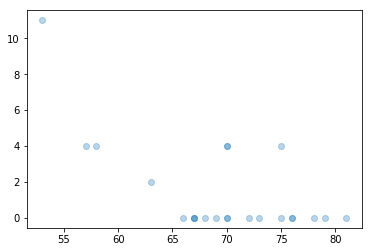

In [32]:
plt.scatter(df['T'], df['I'], alpha = 0.3)
plt.show()

In [31]:
import statsmodels.formula.api as smf
model = smf.ols('I ~ T',data=df)
# model = smf.ols(df['I'],df['T'])
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      I   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                     14.69
Date:                Wed, 23 Jan 2019   Prob (F-statistic):           0.000968
Time:                        15:20:32   Log-Likelihood:                -48.672
No. Observations:                  23   AIC:                             101.3
Df Residuals:                      21   BIC:                             103.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.3651      4.439      4.138      0.0

Things to care about here:

* Intercept and slope (T) coefficients and std errors for these
* t and P>t if you're frequentist

Residual std error doesn't seem to be there
R^2 is .4

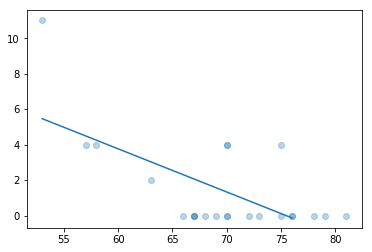

In [37]:
plt.scatter(df['T'], df['I'], alpha = 0.3)
x = np.linspace(53,76,100)
y = -0.2434*x+18.3651
plt.plot(x,y)
plt.show()